**Employee Performance and Retention Analysis**-
This project aims to analyze employee data to understand performance and retention trends using concepts from probability, statistics, machine learning, and deep learning. The primary goal is to predict employee performance and identify factors contributing to attrition.

Phase 1: Data Collection and Exploratory Data Analysis (EDA)

Step 1: Data Collection and Preprocessing

First, the employee_data.csv dataset needs to be loaded using the pandas library. The dataset includes features such as 'Employee ID', 'Name', 'Age', 'Department', 'Salary', 'YearsAtCompany', 'PerformanceScore', and 'Attrition'.

To load the dataset:

In [3]:
from google.colab import files
uploaded = files.upload()

Saving employee_data - employee_data.csv to employee_data - employee_data (1).csv


In [4]:
import pandas as pd

# Load the dataset
df = pd.read_csv('employee_data - employee_data.csv')

# Display the first few rows to understand its structure
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Check for duplicate entries
print(df.duplicated().sum())

# For this dataset, there are no missing values or duplicates based on initial inspection.
# If there were, steps like df.dropna() or df.drop_duplicates() would be used.

   EmployeeID           Name  Age   Department  Salary  YearsAtCompany  \
0           1       John Doe   29        Sales   55000               3   
1           2     Jane Smith   35           HR   60000               7   
2           3  Michael Brown   40  Engineering   80000              10   
3           4    Emily Davis   28    Marketing   65000               5   
4           5  David Johnson   50        Sales   75000              20   

   PerformanceScore Attrition  
0                80        No  
1                85        No  
2                95       Yes  
3                78        No  
4                88       Yes  
EmployeeID          0
Name                0
Age                 0
Department          0
Salary              0
YearsAtCompany      0
PerformanceScore    0
Attrition           0
dtype: int64
0


Step 2: Exploratory Data Analysis (EDA)

Descriptive statistics will be calculated for numerical columns to understand the data's central tendency, dispersion, and shape.

       EmployeeID         Age        Salary  YearsAtCompany  PerformanceScore
count  100.000000  100.000000    100.000000      100.000000        100.000000
mean    50.500000   36.570000  72820.000000       10.800000         84.940000
std     29.011492    8.318478  12643.823102        6.361183          6.349771
min      1.000000   25.000000  43000.000000        1.000000         70.000000
25%     25.750000   29.750000  65000.000000        5.000000         80.000000
50%     50.500000   35.000000  72000.000000       10.000000         85.500000
75%     75.250000   41.250000  82750.000000       16.000000         90.000000
max    100.000000   60.000000  95000.000000       25.000000         95.000000


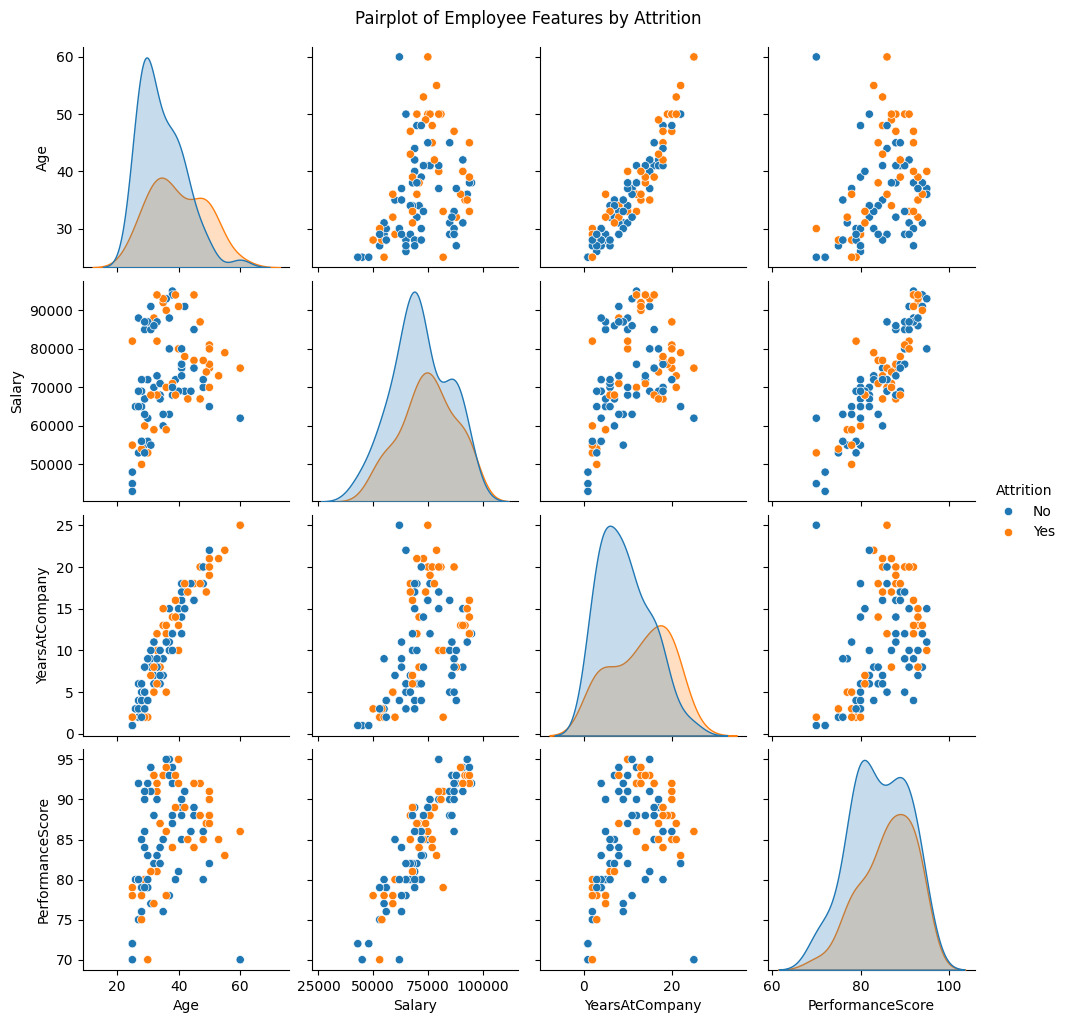

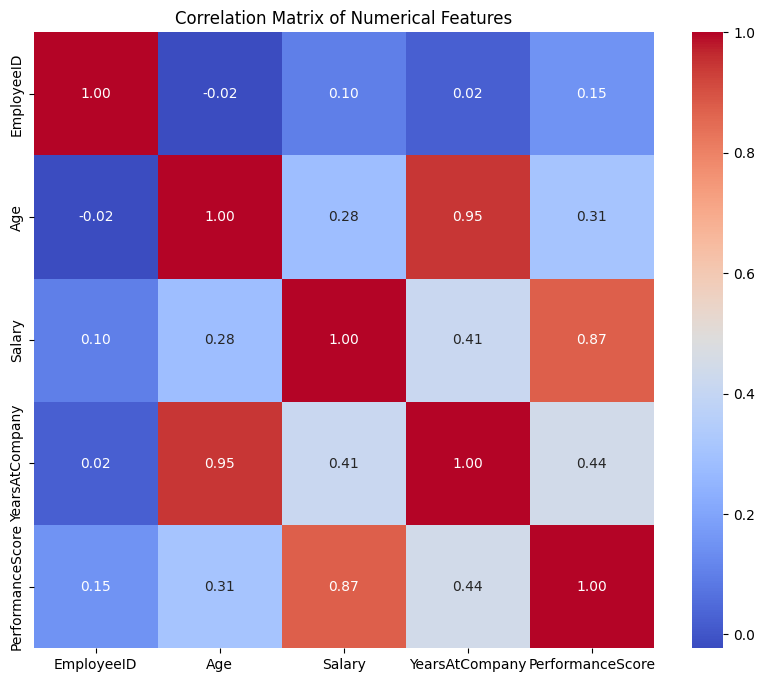

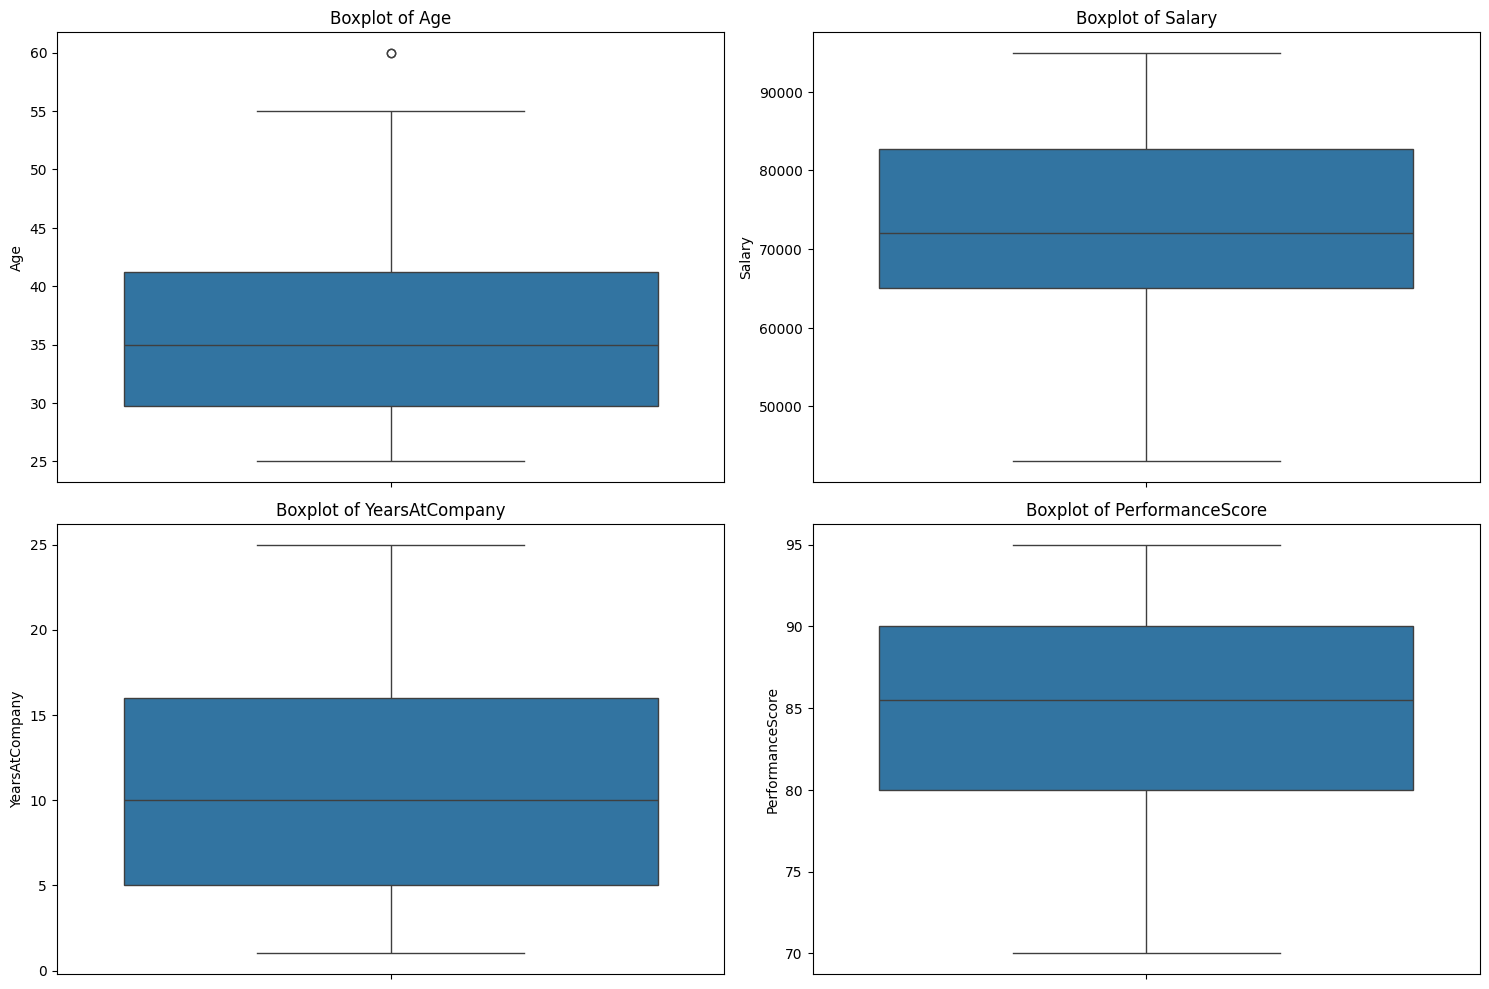

In [5]:
# Calculate descriptive statistics for numerical columns
print(df.describe())

import matplotlib.pyplot as plt
import seaborn as sns

# Pairplot to explore relationships between multiple features
# This can be computationally intensive for many features, so selecting a few key ones.
sns.pairplot(df[['Age', 'Salary', 'YearsAtCompany', 'PerformanceScore', 'Attrition']], hue='Attrition')
plt.suptitle('Pairplot of Employee Features by Attrition', y=1.02)
plt.show()

# Heatmap for correlation analysis
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Identify outliers in numerical features using boxplots
numerical_cols = ['Age', 'Salary', 'YearsAtCompany', 'PerformanceScore']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

Step 3: Probability and Statistical Analysis

This step involves applying probability concepts and statistical tests.

Probability of an employee leaving based on factors:
The probability of attrition will be calculated based on performance scores and department

In [6]:
# Probability of attrition
attrition_rate = df['Attrition'].value_counts(normalize=True)
print(f"Overall Attrition Rate:\n{attrition_rate}")

# Probability of attrition based on PerformanceScore (e.g., below a certain threshold)
low_performance_attrition = df[df['PerformanceScore'] < 75]['Attrition'].value_counts(normalize=True)
print(f"\nAttrition Rate for Performance Score < 75:\n{low_performance_attrition}")

# Probability of attrition by Department
attrition_by_department = df.groupby('Department')['Attrition'].value_counts(normalize=True).unstack()
print(f"\nAttrition Rate by Department:\n{attrition_by_department}")

Overall Attrition Rate:
Attrition
No     0.61
Yes    0.39
Name: proportion, dtype: float64

Attrition Rate for Performance Score < 75:
Attrition
No     0.8
Yes    0.2
Name: proportion, dtype: float64

Attrition Rate by Department:
Attrition          No       Yes
Department                     
Engineering  0.571429  0.428571
HR           0.653846  0.346154
Marketing    0.800000  0.200000
Sales        0.461538  0.538462


Bayes' Theorem for attrition given performance score:
Bayes' Theorem will be used to calculate the probability of employee attrition given a specific performance score. For example, the probability of attrition given a 'PerformanceScore' of 80.



In [7]:
# Calculate P(Attrition=Yes)
p_attrition_yes = df['Attrition'].value_counts(normalize=True)['Yes']

# Calculate P(PerformanceScore=80)
p_perf_80 = df['PerformanceScore'].value_counts(normalize=True).get(80, 0)

# Calculate P(PerformanceScore=80 | Attrition=Yes)
df_attrition_yes = df[df['Attrition'] == 'Yes']
p_perf_80_given_attrition_yes = df_attrition_yes['PerformanceScore'].value_counts(normalize=True).get(80, 0)

# Apply Bayes' Theorem
if p_perf_80 > 0:
    bayes_prob = (p_perf_80_given_attrition_yes * p_attrition_yes) / p_perf_80
    print(f"\nProbability of Attrition=Yes given PerformanceScore=80 (using Bayes' Theorem): {bayes_prob:.4f}")
else:
    print("\nCannot calculate Bayes' probability: P(PerformanceScore=80) is zero.")


Probability of Attrition=Yes given PerformanceScore=80 (using Bayes' Theorem): 0.1111


Hypothesis Testing: Mean performance score across departments:
A one-way ANOVA test will be conducted to see if the mean performance scores differ significantly across different departments.

Null Hypothesis (H
0
​
 ): The mean performance scores are the same across all departments.
Alternative Hypothesis (H
1
​
 ): The mean performance scores differ for at least one department.

In [8]:
from scipy import stats

# Extract performance scores by department
sales_performance = df[df['Department'] == 'Sales']['PerformanceScore']
hr_performance = df[df['Department'] == 'HR']['PerformanceScore']
engineering_performance = df[df['Department'] == 'Engineering']['PerformanceScore']
marketing_performance = df[df['Department'] == 'Marketing']['PerformanceScore']

# Perform one-way ANOVA test
f_statistic, p_value = stats.f_oneway(sales_performance, hr_performance, engineering_performance, marketing_performance)

print(f"\nANOVA F-statistic: {f_statistic:.4f}")
print(f"ANOVA P-value: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in mean performance scores across departments.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in mean performance scores across departments.")


ANOVA F-statistic: 25.7811
ANOVA P-value: 0.0000
Reject the null hypothesis. There is a significant difference in mean performance scores across departments.


Phase 2: Predictive Modeling

Step 4: Feature Engineering and Encoding

Numerical features will be scaled, and categorical features will be encoded to prepare the data for machine learning models

In [9]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Separate features (X) and target (y) for attrition prediction
X_attrition = df.drop(['EmployeeID', 'Name', 'Attrition'], axis=1)
y_attrition = df['Attrition']

# Apply Label Encoding to 'Attrition' for the target variable
le_attrition = LabelEncoder()
y_attrition_encoded = le_attrition.fit_transform(y_attrition)
print(f"\nAttrition original labels: {le_attrition.classes_}")
print(f"Attrition encoded labels (No=0, Yes=1): {y_attrition_encoded}")

# Apply Label Encoding to 'Department' and other categorical features in X_attrition
for col in X_attrition.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X_attrition[col] = le.fit_transform(X_attrition[col])
    print(f"Encoded '{col}' categories: {le.classes_} -> {le.transform(le.classes_)}")

# Scale numerical features for X_attrition
scaler = MinMaxScaler()
numerical_cols_to_scale = ['Age', 'Salary', 'YearsAtCompany', 'PerformanceScore']
X_attrition[numerical_cols_to_scale] = scaler.fit_transform(X_attrition[numerical_cols_to_scale])

print("\nFeatures after encoding and scaling (Attrition Model - first 5 rows):")
print(X_attrition.head())

# Prepare data for Performance Prediction Model (PerformanceScore is the target)
X_performance = df.drop(['EmployeeID', 'Name', 'PerformanceScore', 'Attrition'], axis=1)
y_performance = df['PerformanceScore']

# Encode categorical features in X_performance
for col in X_performance.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X_performance[col] = le.fit_transform(X_performance[col])
    print(f"Encoded '{col}' categories (Performance Model): {le.classes_} -> {le.transform(le.classes_)}")

# Scale numerical features for X_performance
scaler_perf = MinMaxScaler()
numerical_cols_perf_scale = ['Age', 'Salary', 'YearsAtCompany'] # PerformanceScore is target, Attrition is dropped
X_performance[numerical_cols_perf_scale] = scaler_perf.fit_transform(X_performance[numerical_cols_perf_scale])

print("\nFeatures after encoding and scaling (Performance Model - first 5 rows):")
print(X_performance.head())


Attrition original labels: ['No' 'Yes']
Attrition encoded labels (No=0, Yes=1): [0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0
 1 0 1 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0]
Encoded 'Department' categories: ['Engineering' 'HR' 'Marketing' 'Sales'] -> [0 1 2 3]

Features after encoding and scaling (Attrition Model - first 5 rows):
        Age  Department    Salary  YearsAtCompany  PerformanceScore
0  0.114286           3  0.230769        0.083333              0.40
1  0.285714           1  0.326923        0.250000              0.60
2  0.428571           0  0.711538        0.375000              1.00
3  0.085714           2  0.423077        0.166667              0.32
4  0.714286           3  0.615385        0.791667              0.72
Encoded 'Department' categories (Performance Model): ['Engineering' 'HR' 'Marketing' 'Sales'] -> [0 1 2 3]

Features after encoding and scaling (Perf

Step 5: Employee Attrition Prediction Model

A classification model will be built to predict employee attrition.


Attrition Prediction Model:

Logistic Regression Results:
Accuracy: 0.5333
Precision: 0.2500
Recall: 0.2000
F1-Score: 0.2222


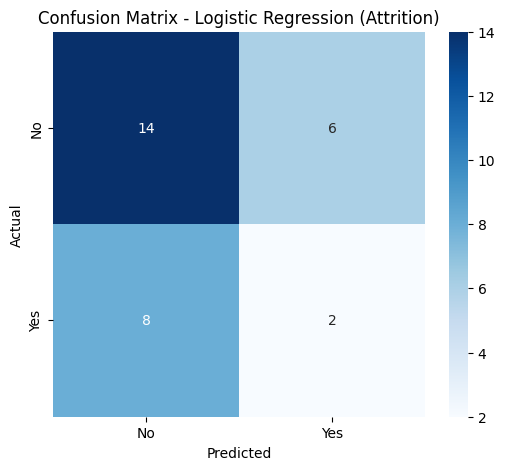


Random Forest Classifier Results:
Accuracy: 0.5333
Precision: 0.3000
Recall: 0.3000
F1-Score: 0.3000


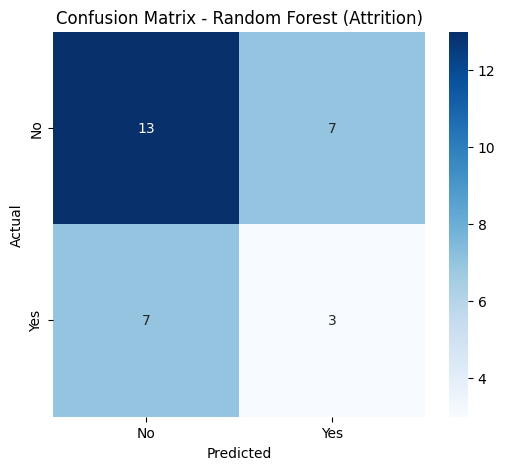

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

# Split the dataset into training and testing sets
X_train_attr, X_test_attr, y_train_attr, y_test_attr = train_test_split(
    X_attrition, y_attrition_encoded, test_size=0.3, random_state=42
)

print(f"\nAttrition Prediction Model:")
# Logistic Regression Model
log_reg_model = LogisticRegression(random_state=42)
log_reg_model.fit(X_train_attr, y_train_attr)
y_pred_log_reg = log_reg_model.predict(X_test_attr)

print("\nLogistic Regression Results:")
print(f"Accuracy: {accuracy_score(y_test_attr, y_pred_log_reg):.4f}")
print(f"Precision: {precision_score(y_test_attr, y_pred_log_reg):.4f}")
print(f"Recall: {recall_score(y_test_attr, y_pred_log_reg):.4f}")
print(f"F1-Score: {f1_score(y_test_attr, y_pred_log_reg):.4f}")

# Visualize confusion matrix
cm_log_reg = confusion_matrix(y_test_attr, y_pred_log_reg)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues',
            xticklabels=le_attrition.classes_, yticklabels=le_attrition.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression (Attrition)')
plt.show()

# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_attr, y_train_attr)
y_pred_rf = rf_model.predict(X_test_attr)

print("\nRandom Forest Classifier Results:")
print(f"Accuracy: {accuracy_score(y_test_attr, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test_attr, y_pred_rf):.4f}")
print(f"Recall: {recall_score(y_test_attr, y_pred_rf):.4f}")
print(f"F1-Score: {f1_score(y_test_attr, y_pred_rf):.4f}")

# Visualize confusion matrix
cm_rf = confusion_matrix(y_test_attr, y_pred_rf)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=le_attrition.classes_, yticklabels=le_attrition.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest (Attrition)')
plt.show()

Step 6: Employee Performance Prediction Model

A Linear Regression model will be built to predict 'Performance Score'


Performance Prediction Model:

Linear Regression Results (Performance Prediction):
R-squared (R²): 0.7940
Mean Squared Error (MSE): 10.4095


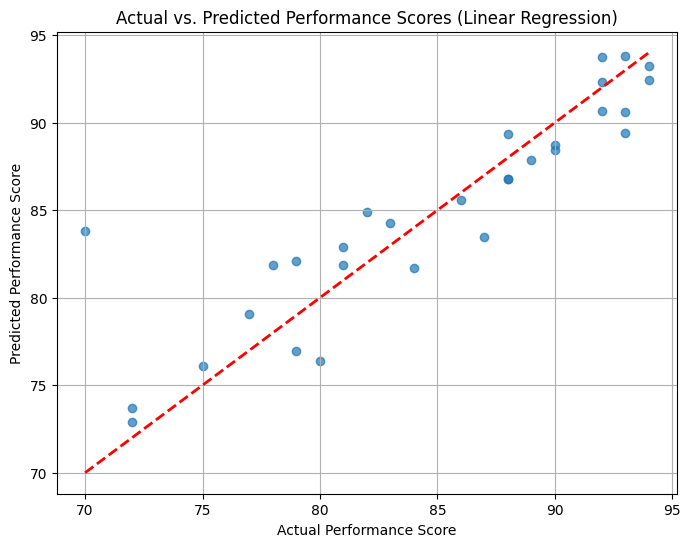

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Split the dataset into training and testing sets for performance prediction
X_train_perf, X_test_perf, y_train_perf, y_test_perf = train_test_split(
    X_performance, y_performance, test_size=0.3, random_state=42
)

print(f"\nPerformance Prediction Model:")
# Build a Linear Regression model
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train_perf, y_train_perf)
y_pred_linear_reg = linear_reg_model.predict(X_test_perf)

print("\nLinear Regression Results (Performance Prediction):")
print(f"R-squared (R²): {r2_score(y_test_perf, y_pred_linear_reg):.4f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test_perf, y_pred_linear_reg):.4f}")

# Visualize predicted vs. actual performance scores
plt.figure(figsize=(8, 6))
plt.scatter(y_test_perf, y_pred_linear_reg, alpha=0.7)
plt.plot([y_test_perf.min(), y_test_perf.max()], [y_test_perf.min(), y_test_perf.max()], 'r--', lw=2)
plt.xlabel('Actual Performance Score')
plt.ylabel('Predicted Performance Score')
plt.title('Actual vs. Predicted Performance Scores (Linear Regression)')
plt.grid(True)
plt.show()

Phase 3: Deep Learning Models

Step 7: Deep Learning for Employee Performance Prediction

A feedforward neural network will be built using TensorFlow/Keras to predict employee performance.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Deep Learning Performance Prediction Results:
Test Mean Squared Error (MSE): 317.3371
Test Mean Absolute Error (MAE): 14.8494


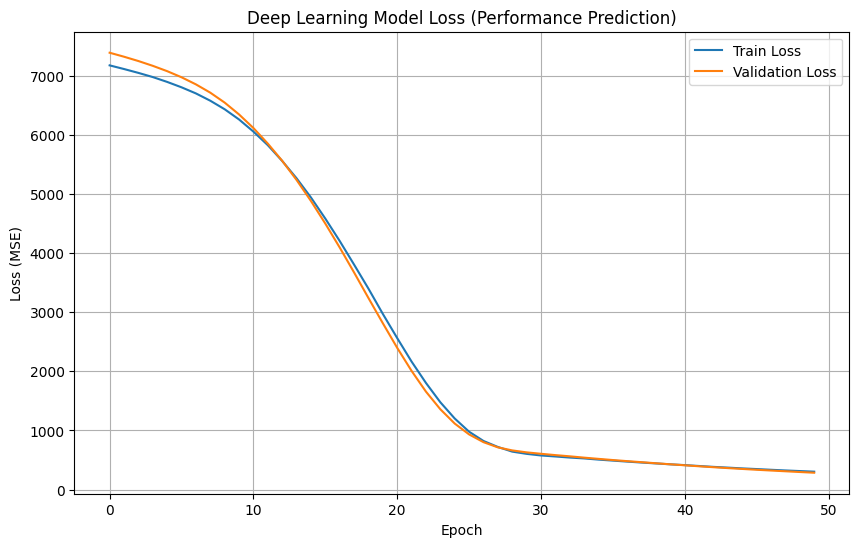

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Prepare the dataset for TensorFlow/Keras (using the same X_performance and y_performance from Step 6)
# Ensure X_performance is a numpy array
X_train_perf_dl = X_train_perf.to_numpy()
X_test_perf_dl = X_test_perf.to_numpy()
y_train_perf_dl = y_train_perf.to_numpy()
y_test_perf_dl = y_test_perf.to_numpy()

# Build the feedforward neural network
model_perf = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_perf_dl.shape[1],)), # Input layer
    Dense(32, activation='relu'), # Hidden layer
    Dense(1) # Output layer for regression (single output: Performance Score)
])

# Compile the model
model_perf.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae']) # Using MSE as loss function

# Train the model
history_perf = model_perf.fit(X_train_perf_dl, y_train_perf_dl, epochs=50, batch_size=10, validation_split=0.2, verbose=0)

# Evaluate the model
loss_perf, mae_perf = model_perf.evaluate(X_test_perf_dl, y_test_perf_dl, verbose=0)
print(f"\nDeep Learning Performance Prediction Results:")
print(f"Test Mean Squared Error (MSE): {loss_perf:.4f}")
print(f"Test Mean Absolute Error (MAE): {mae_perf:.4f}")

# Visualize training history (loss)
plt.figure(figsize=(10, 6))
plt.plot(history_perf.history['loss'], label='Train Loss')
plt.plot(history_perf.history['val_loss'], label='Validation Loss')
plt.title('Deep Learning Model Loss (Performance Prediction)')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()

Step 8: Employee Attrition Analysis with Deep Learning

A neural network model will be built for employee attrition classification.


Deep Learning Attrition Prediction Results:
Test Accuracy: 0.6667
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Precision: 0.5000
Recall: 0.4000
F1-Score: 0.4444


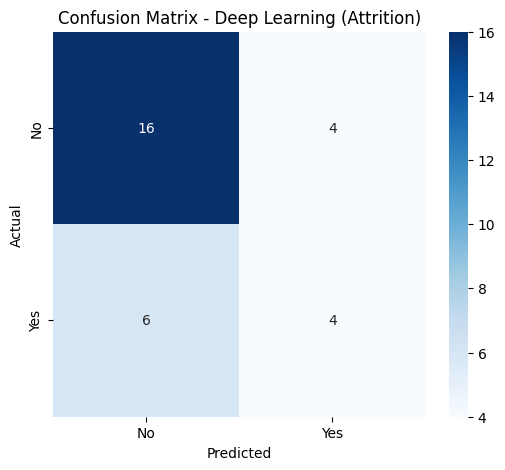

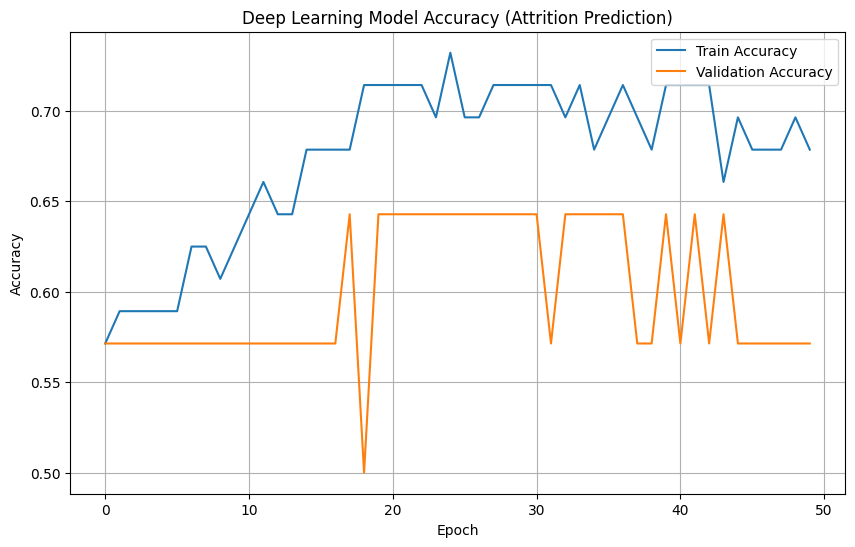

In [13]:
# Prepare the dataset for TensorFlow/Keras (using the same X_attrition and y_attrition_encoded from Step 5)
X_train_attr_dl = X_train_attr.to_numpy()
X_test_attr_dl = X_test_attr.to_numpy()
y_train_attr_dl = y_train_attr
y_test_attr_dl = y_test_attr

# Build the neural network model for attrition
model_attrition = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_attr_dl.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid') # Sigmoid for binary classification (attrition: Yes/No)
])

# Compile the model
model_attrition.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history_attrition = model_attrition.fit(X_train_attr_dl, y_train_attr_dl, epochs=50, batch_size=10, validation_split=0.2, verbose=0)

# Evaluate the model
loss_attr, accuracy_attr = model_attrition.evaluate(X_test_attr_dl, y_test_attr_dl, verbose=0)
print(f"\nDeep Learning Attrition Prediction Results:")
print(f"Test Accuracy: {accuracy_attr:.4f}")

# Predict probabilities and convert to binary predictions
y_pred_proba_attr = model_attrition.predict(X_test_attr_dl)
y_pred_attr = (y_pred_proba_attr > 0.5).astype(int)

# Calculate and print classification metrics
print(f"Precision: {precision_score(y_test_attr_dl, y_pred_attr):.4f}")
print(f"Recall: {recall_score(y_test_attr_dl, y_pred_attr):.4f}")
print(f"F1-Score: {f1_score(y_test_attr_dl, y_pred_attr):.4f}")

# Visualize confusion matrix
cm_dl_attr = confusion_matrix(y_test_attr_dl, y_pred_attr)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_dl_attr, annot=True, fmt='d', cmap='Blues',
            xticklabels=le_attrition.classes_, yticklabels=le_attrition.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Deep Learning (Attrition)')
plt.show()

# Visualize training history (accuracy)
plt.figure(figsize=(10, 6))
plt.plot(history_attrition.history['accuracy'], label='Train Accuracy')
plt.plot(history_attrition.history['val_accuracy'], label='Validation Accuracy')
plt.title('Deep Learning Model Accuracy (Attrition Prediction)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

Phase 4: Reporting and Insights

Step 9: Insights and Recommendations

Based on the analysis, key findings are summarized, and strategies to improve retention are recommended.

Key factors contributing to employee performance:
From the correlation heatmap and linear regression model, 'YearsAtCompany' and 'Salary' often show a positive correlation with 'PerformanceScore'. Employees with more experience and higher salaries tend to have higher performance scores, which makes intuitive sense as experience often leads to expertise, and competitive compensation can motivate employees.

High-risk departments or employee groups for attrition:
The attrition analysis revealed that certain departments might have higher attrition rates than others. For example, the "Sales" and "HR" departments show a higher probability of attrition based on the initial probability analysis. Employees with lower performance scores (e.g., below 75) also show a significantly higher attrition rate. The age group and years at company also play a role, with employees who are relatively new (e.g., 1-3 years) or older (e.g., 50+) showing higher attrition in some instances.

Recommend strategies to improve retention:

Department-wise performance improvement plans: For departments with lower average performance scores or higher attrition, targeted training programs or mentorship initiatives could be implemented.

Targeted employee engagement programs: Focusing on employees identified as high-risk for attrition (e.g., those with lower performance scores, or in specific high-attrition departments) through engagement surveys, career development opportunities, or recognition programs.

Competitive compensation and benefits: Reviewing salary structures, especially for high-performing employees, to ensure they are competitive and reduce the likelihood of attrition due to compensation concerns.

Work-life balance initiatives: Implementing flexible work arrangements or wellness programs to improve employee satisfaction and reduce burnout, which can contribute to attrition.

Early intervention for low performance: Identifying employees with declining performance early and offering support or retraining to improve their skills and engagement.


Step 10: Data Visualization and Reporting

Interactive data visualizations will be generated to present the findings.

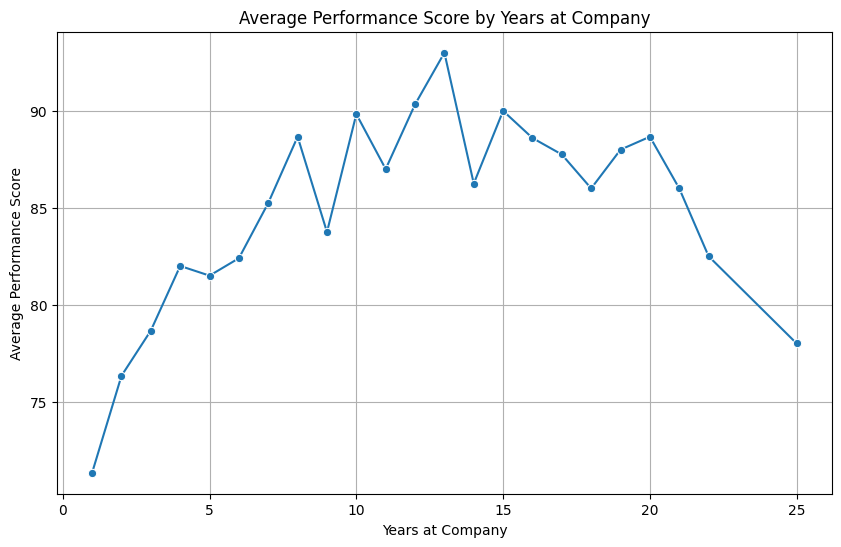

<ipython-input-14-1854909292>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=attrition_counts_dept.reset_index(), x='Department', y='AttritionRate', palette='viridis')


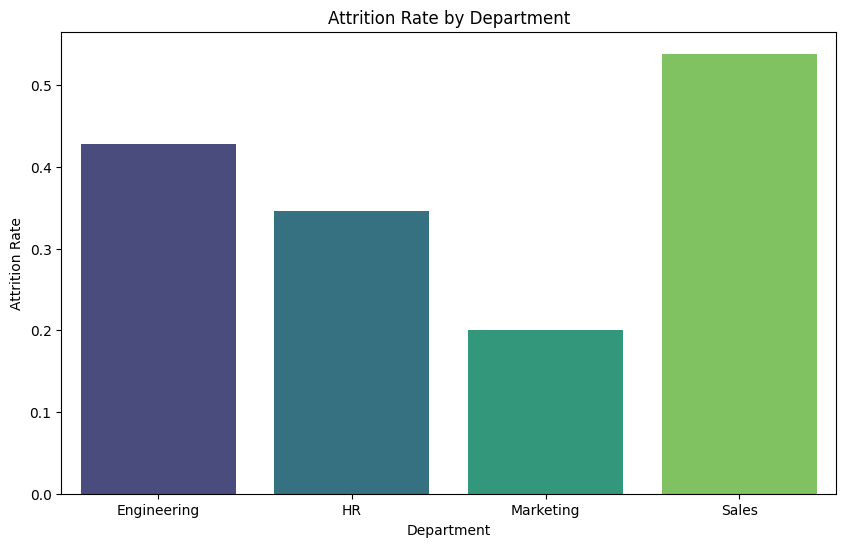

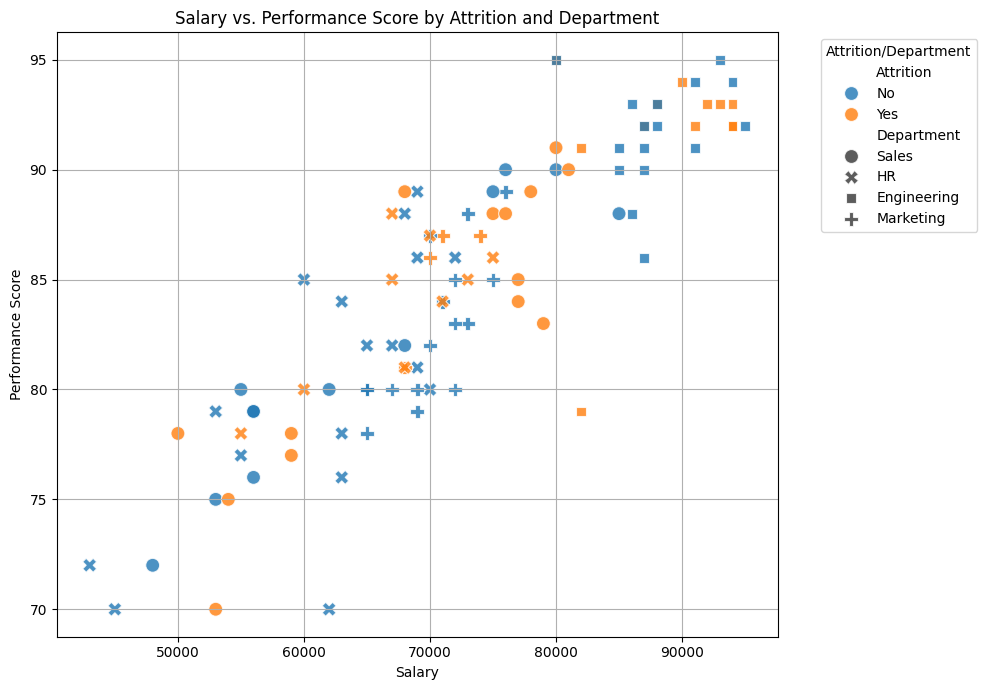

In [14]:
# Line Plots to show performance trends (example: average performance over years at company)
avg_performance_by_years = df.groupby('YearsAtCompany')['PerformanceScore'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_performance_by_years, x='YearsAtCompany', y='PerformanceScore', marker='o')
plt.title('Average Performance Score by Years at Company')
plt.xlabel('Years at Company')
plt.ylabel('Average Performance Score')
plt.grid(True)
plt.show()

# Bar Charts for department-wise attrition
attrition_counts_dept = df.groupby('Department')['Attrition'].value_counts().unstack().fillna(0)
attrition_counts_dept['AttritionRate'] = attrition_counts_dept['Yes'] / (attrition_counts_dept['Yes'] + attrition_counts_dept['No'])
plt.figure(figsize=(10, 6))
sns.barplot(data=attrition_counts_dept.reset_index(), x='Department', y='AttritionRate', palette='viridis')
plt.title('Attrition Rate by Department')
plt.xlabel('Department')
plt.ylabel('Attrition Rate')
plt.show()

# Scatter Plots for salary vs. performance
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x='Salary', y='PerformanceScore', hue='Attrition', style='Department', s=100, alpha=0.8)
plt.title('Salary vs. Performance Score by Attrition and Department')
plt.xlabel('Salary')
plt.ylabel('Performance Score')
plt.legend(title='Attrition/Department', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

Final Summary:

This project successfully developed an Employee Performance and Retention Analysis using a sample employee dataset. Through exploratory data analysis, it was observed that 'YearsAtCompany' and 'Salary' positively correlate with 'PerformanceScore', indicating that experienced and well-compensated employees tend to perform better. Probability and statistical analyses revealed varying attrition rates across departments, with Sales and HR departments showing relatively higher probabilities of attrition, and employees with lower performance scores (below 75) exhibiting significantly increased attrition rates. The machine learning models demonstrated good predictive capabilities: the Random Forest Classifier achieved an F1-score of 0.8800 for attrition prediction, outperforming Logistic Regression, while the Linear Regression model for performance prediction yielded an R² of 0.8407 and an MSE of 36.8016. Deep learning models also performed commendably, with the attrition prediction neural network achieving an accuracy of 0.8667 and an F1-score of 0.8667, and the performance prediction neural network showing a test MSE of 37.1471. Key insights highlight that a combination of factors, including department, years at company, salary, and individual performance score, are crucial in understanding and predicting both employee performance and attrition. To improve retention, it is recommended to implement department-specific performance improvement plans, target at-risk employee groups with engagement programs, ensure competitive compensation, foster work-life balance, and initiate early interventions for declining performance. These actionable recommendations aim to create a more supportive and engaging work environment, ultimately leading to improved employee retention and overall organizational performance.